### PCA & Correlation - How do they relate?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Points with no correlation

In [168]:
s = 100

In [169]:
x = np.random.normal(1, 1, size=s)
y = np.random.normal(1, 1, size=s)

no_correlation = (x, y)
no_cor = np.corrcoef(*no_correlation)[0][1]

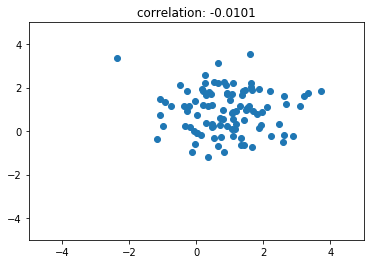

In [170]:
fig, ax = plt.subplots()
plt.scatter(*no_correlation)
ax.set_title("correlation: %0.4f" % no_cor)
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
plt.show()

### Correlated points

In [171]:
x = np.random.normal(1, 1, size=s)
y = x + np.random.normal(1, 1, size=s) - 1

correlation = (x, y)
cor = np.corrcoef(*correlation)[0][1]

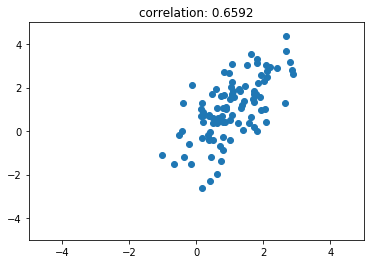

In [172]:
fig, ax = plt.subplots()
plt.scatter(*correlation)
ax.set_title("correlation: %0.4f" % cor)
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
plt.show()

### PCA
1. Subtract mean from each attribute

#### not correlated data

In [203]:
x, y = no_correlation

x_mean = x.mean()
y_mean = y.mean()

x = x - x_mean
y = y - y_mean

data = np.mat(np.array([x, y]))

R = data*data.T
eigval, eigvec = np.linalg.eig(R)
print(eigval)

[114.65359641  99.41578236]


In [308]:
x, y = correlation

x_mean = x.mean()
y_mean = y.mean()

x = x - x_mean
y = y - y_mean

data = np.mat(np.array([x, y]))

R = data*data.T
eigval, eigvec = np.linalg.eig(R)

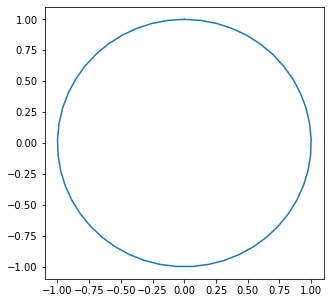

In [309]:
fig, ax = plt.subplots(figsize=(5, 5))
r = np.linspace(0, 2*np.pi)
xx = np.sin(r)
yy = np.cos(r)
plt.plot(xx, yy)
plt.show()

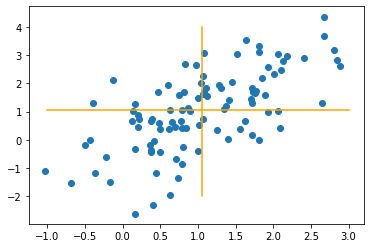

In [312]:
from matplotlib.patches import Ellipse

fig, ax = plt.subplots()
plt.scatter(*correlation)
plt.plot([-1, 3], [y_mean, y_mean], c="orange")
plt.plot([x_mean, x_mean], [-2, 4], c="orange")
# ax.add_artist(Ellipse((x_mean, y_mean), ev[0], ev[1], color='r', fill=None))
plt.show()

In [361]:
np.sqrt(eigval[0])

5.769407429157708

In [362]:
np.sqrt(eigval[1])

15.161747236160581

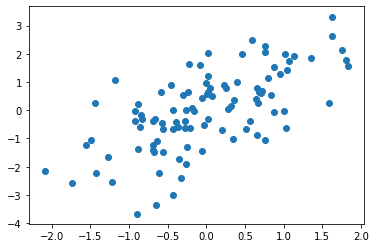

In [360]:
# shifted towards average
fig, ax = plt.subplots()
plt.scatter(x, y)
ax.add_artist(Ellipse((0, 0), np.sqrt(eigval[0]), np.sqrt(eigval[1]), color='r', fill=None))
plt.show()

In [363]:
shifted = np.array([x, y])
res = np.array(eigvec*shifted)

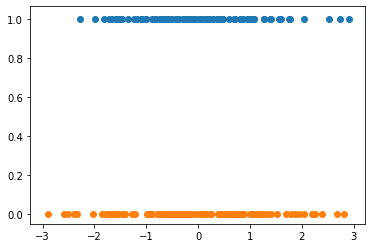

In [364]:
plt.scatter(res[1], [1]*100)
plt.scatter(res[0], [0]*100)